- title: Create New Columns Based on Operations 
- slug: create-new-column-python-pandas
- summary: Learn how to create new columns in a pandas DataFrame through math operations and conditionals among various columns
- date: 2018-12-24 16:49  
- category: Data Analysis
- subcategory: Data Wrangling
- posttype: Tutorial
- keywords: create new column pandas
- tags: python, pandas
- authors: Dan Friedman

A pivotal part of data analysis is to create new columns based on some operation. This tutorial will cover multiple ways to do that.

### Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Get Tips Dataset

Let's get the `tips` dataset from the Python <a href='https://seaborn.pydata.org/'>`seaborn` visualization library</a> and assign it to the DataFrame `df_tips`.

In [2]:
df_tips = sns.load_dataset('tips')

Each row represents a unique meal at a restaurant for a party of people; the dataset contains the following fields:

column name | column description 
--- | ---
`total_bill` | financial amount of meal in U.S. dollars
`tip` |  financial amount of the meal's tip in U.S. dollars
`sex` | gender of server
`smoker` | boolean to represent if server smokes or not
`day` | day of week
`time` | meal name (Lunch or Dinner)
`size` | count of people eating meal

Preview the first 5 rows of `df_tips` using the pandas series <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.head.html'>`head()` method</a>. 

In [3]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Create New Column Based on Mathematical Operations of Column(s)

We can perform mathematical operations on columns such as addition, division and multiplication.

#### Addition

Let's create a new column called `total_money_received` that's the addition of the `total_bill` and `tip` column. This total amount is how much money the restaurant receives for each order.

In [4]:
df_tips['total_money_received'] = df_tips['total_bill'] + df_tips['tip']

Let's see a preview of these three columnns.

In [5]:
df_tips[['total_bill', 'tip', 'total_money_received']].sample(n=5)

,total_bill,tip,total_money_received
106,20.49,4.06,24.55
163,13.81,2.00,15.81
124,12.48,2.52,15.00
155,29.85,5.14,34.99
54,25.56,4.34,29.90


#### Division

Let's create a new column called `tip_proportion_of_total_bill` that's a calculation of `tip` values divided by their respective `total_bill` value.

In [6]:
df_tips['tip_proportion_of_total_bill'] = df_tips['tip']/df_tips['total_bill']


Let's preview these three columns.

In [7]:
df_tips[['total_bill', 'tip', 'tip_proportion_of_total_bill']].sample(n=5)

,total_bill,tip,tip_proportion_of_total_bill
127,14.52,2.00,0.137741
25,17.81,2.34,0.131387
235,10.07,1.25,0.124131
65,20.08,3.15,0.156873
12,15.42,1.57,0.101816


For aesthetic purposes of the values in the `tip_proportion_of_total_bill`, I will round all values to four decimal places using the <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html'>`round()` method</a> below.

In [8]:
df_tips['tip_proportion_of_total_bill'] = df_tips['tip_proportion_of_total_bill'].round(decimals=4)

Additionally, I want to create a new column called `money_received_per_person` that's a calculation of `total_money_received` divided by `size`. I round values in this new column to two decimal places.

In [9]:
df_tips['money_received_per_person'] = df_tips['total_money_received']/df_tips['size']
df_tips['money_received_per_person'] = df_tips['money_received_per_person'].round(decimals=2)

Let's preview these three columns.

In [10]:
df_tips[['total_money_received', 'size', 'money_received_per_person']].sample(n=5)

,total_money_received,size,money_received_per_person
64,20.23,3,6.74
61,15.81,2,7.90
141,41.00,6,6.83
150,16.57,2,8.28
155,34.99,5,7.00


#### Multiplication

I want to create a new column called `tip_percentage_of_total_bill` that simply takes our column called `tip_proportion_of_total_bill` and multiplies the value by 100. I round values in this new column to two decimal places.

In [11]:
df_tips['tip_percentage_of_total_bill'] = df_tips['tip_proportion_of_total_bill']*100
df_tips['tip_percentage_of_total_bill'] = df_tips['tip_percentage_of_total_bill'].round(decimals=3)

Let's preview these columns recently used for multiplication.

In [12]:
df_tips[['total_bill', 'tip', 'tip_proportion_of_total_bill', 'tip_percentage_of_total_bill']].head()

,total_bill,tip,tip_proportion_of_total_bill,tip_percentage_of_total_bill
0,16.99,1.01,0.0594,5.94
1,10.34,1.66,0.1605,16.05
2,21.01,3.50,0.1666,16.66
3,23.68,3.31,0.1398,13.98
4,24.59,3.61,0.1468,14.68


### Create New Column Based on Mapping of Current Values to New Values

In our `day` column, we see the following unique values printed out below using the pandas series <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html'>`unique` method</a>.

In [13]:
df_tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

I don't like how the days are shortened names. The name `Sun` can be mapped to a longer and more colloquial name of `Sunday`.

In pandas, we can use the series <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html'>`map()` method</a> to map our current values, the shortened 
day names, to longer more colloquial names of days, our new values that we'll create in a new column called `day_long_name`.

Below is a Python dictionary that assigns the short day names as keys and the longer names to their respective values.

In [14]:
short_day_name_to_long_name = {'Sun': 'Sunday', 'Sat': 'Saturday', 'Thur': 'Thursday', 'Fri': 'Friday'}

Let's assign the `map()` method to the `day` column and set the argument `arg` equal to our `short_day_name_to_long_name` dictionary. We'll set this equal to be the values in a new column assigned to `day_long_name`.

In [15]:
df_tips['day_long_name'] = df_tips['day'].map(arg=short_day_name_to_long_name)

Let's preview a few random rows of `day` and `day_long_name`.

In [16]:
df_tips[['day', 'day_long_name']].sample(n=5)

,day,day_long_name
40,Sat,Saturday
192,Thur,Thursday
89,Thur,Thursday
202,Thur,Thursday
98,Fri,Friday


### Create New Column Based on Conditions Across Various Columns

If I were the owner of this restaurant, I'd want to learn more about the context of large groups who ordered a large dollar amount of food. To learn more about this category, I want to create a new column in our DataFrame with these characteristics.

First, let's view the distribution of the column `money_received_per_person`.

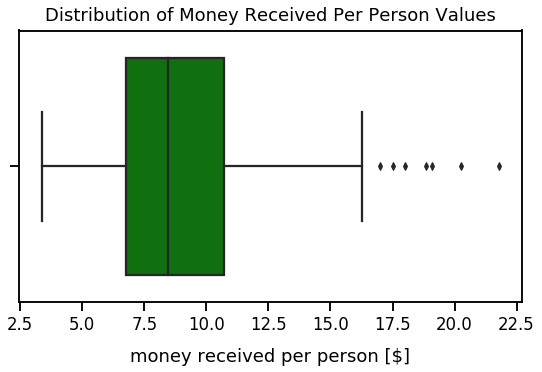

In [31]:
sns.set_context('talk')
plt.figure(figsize=(9, 5))
sns.boxplot(df_tips['money_received_per_person'], color='green')
plt.title("Distribution of Money Received Per Person Values", y=1.015)
plt.xlabel("money received per person [$]", labelpad=14);

We can see the median is roughly at 8.50 U.S. dollars.

Below, I assign variables for the 75th and 25th percentile of the `money_received_per_person` column that we'll use in our analysis to help create the category of big spenders per person.

In [17]:
large_amt_paid_per_person = round(df_tips['money_received_per_person'].quantile(q=0.75), 2)
large_amt_paid_per_person

10.71

In [18]:
small_amt_paid_per_person = round(df_tips['money_received_per_person'].quantile(q=0.25), 2)
small_amt_paid_per_person

6.75

Below, I assign a variable `conditions` to be a list of conditions that characterize people served at our restaurant by the columns `money_received_per_person` and `size`. In our first index of the variable `conditions`, that condition is met if `money_received_per_person` is greater than `large_amt_paid_per_person` and `size` is greater than or equal to 3. 

In [19]:
conditions = [
    (df_tips['money_received_per_person'] > large_amt_paid_per_person) & (df_tips['size'] >= 3),
    (df_tips['money_received_per_person'] > large_amt_paid_per_person) & (df_tips['size'] < 3),
    (df_tips['money_received_per_person'].between(left=small_amt_paid_per_person, right=large_amt_paid_per_person)) & (df_tips['size'] >= 3),
    (df_tips['money_received_per_person'].between(left=small_amt_paid_per_person, right=large_amt_paid_per_person)) & (df_tips['size'] < 3),
    (df_tips['money_received_per_person'] < small_amt_paid_per_person) & (df_tips['size'] >= 3),
    (df_tips['money_received_per_person'] < small_amt_paid_per_person) & (df_tips['size'] < 3)
]

There's a variable called `choices` that's a list of text strings that classify this category of people that meet this condition. In the example described above, I want to classify that group of people that spend a lot of money per person and are large groups as `big spenders & large group`.

In [20]:
choices = ['big spenders & large group', 'big spenders & small group', 
           'medium spenders & large group', 'medium spenders & small group',
           'small spenders & large group', 'small spenders & small group']

The numpy `select()` method returns an array drawn from elements in a choicelist. We can use our conditions above and are outcome choices to classify those groups of people based on money spent per person and group size.

In the `select()` method below, I set the argument `condlist` to be our `conditions` and the argument `choicelist` to be our `choices`.  I created the variables `conditions` and `choices`. 

In [21]:
df_tips['party_category'] = np.select(condlist=conditions, choicelist=choices)

For the new column created `party_category`, I apply the `value_counts()` method to see a count of each of the unique values in the column.

In [22]:
df_tips['party_category'].value_counts()

medium spenders & small group    82
big spenders & small group       48
medium spenders & large group    40
small spenders & large group     31
small spenders & small group     30
big spenders & large group       13
Name: party_category, dtype: int64

Let's preview the relevant columns used in this analysis.

In [23]:
df_tips[['money_received_per_person', 'size', 'party_category']].sample(n=5)

,money_received_per_person,size,party_category
167,9.05,4,medium spenders & large group
226,6.04,2,small spenders & small group
65,7.74,3,medium spenders & large group
231,6.23,3,small spenders & large group
25,5.04,4,small spenders & large group
